<a href="https://colab.research.google.com/github/mjcast94/DM2023-Lab1-Master/blob/main/DM2023_Lab1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Information
Name: Amanda Castellanos

Student ID: 112065426

GitHub ID: mjcast94

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

# Take Home Exercises



Results from Lab 1 Take Home Exercise

In [86]:
#DATA PREPARATION
#allow Collaboratory access to your google drive
from google.colab import drive
drive.mount('/content/drive')

#specific folder/files you are granting access to
import os
folder_path = '/content/drive/MyDrive/NTHU/Data Mining/DM2023-Lab1-Master'
os.chdir(folder_path)

#import libraries
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np


# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#Exercise 1 - Answer here
for t in twenty_train.data [:3]:
  print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [88]:
#Exercise 2 - Answer here

#every 3rd row
row3 = X.loc[X.index %3 == 0]
print(row3['text'])

#category name for range
X.iloc[2000:2010, 2]

#slicing and replacing value
e = X.copy()
print(e[:5])

e[:1] = 0
e[:5]


0       From: sd345@city.ac.uk (Michael Collier) Subje...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
6       From: jodfishe@silver.ucs.indiana.edu (joseph ...
9       From: libman@hsc.usc.edu (Marlena Libman) Subj...
12      From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
                              ...                        
2244    From: jim.zisfein@factory.com (Jim Zisfein)  S...
2247    From: daniels@math.ufl.edu (TV's Big Dealer) S...
2250    From: ingles@engin.umich.edu (Ray Ingles) Subj...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, Length: 753, dtype: object
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...       

,text,category,category_name
0,0,0,0
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [89]:
# Exercise 3 - Answer here

#row10 = X.loc[X.index %10 = 0]
#'sci.med' in row10['category_name'].value
#X[::N] - notation to query every Nth row

X[X['category_name']== 'sci.med'].iloc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


In [90]:
# Exercise 4 - Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)


0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [91]:

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Exercise 5 -Answer here**
is.null function is searching for EMPTY cells
rows 0,1, and 4 each have values that equate to empty cells
rows 2,3, and 5 technically are not empty as they contain text

**Exercise 6 - Answer**
the row and column sizes have been reduced. Rows were selected at random

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

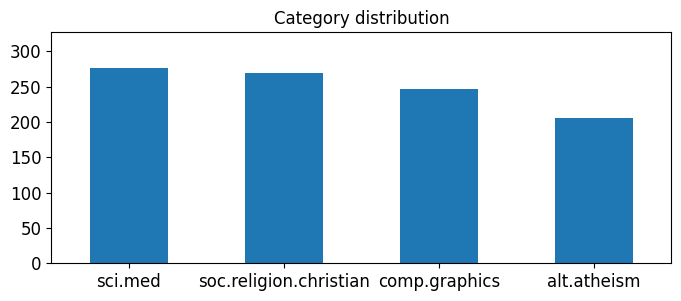

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

#Exercise 7 - Answer here
X_sample = X.sample(n=1000,random_state=42) #random state
# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

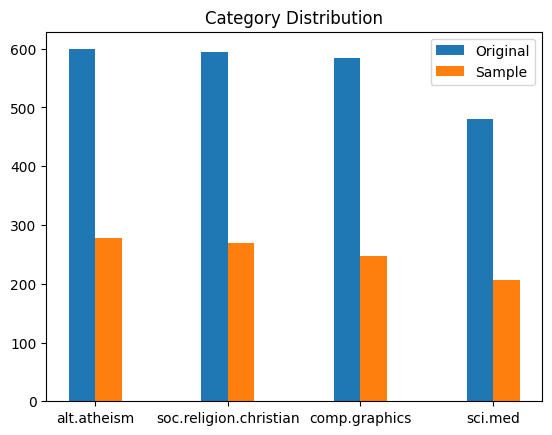

In [102]:
#Exercise 8 - Answer here
ind = np.arange(len(categories))
w = 0.2
labels = ['Original', 'Sample']
bar1 = X.category_name.value_counts()
bar2 = X_sample.category_name.value_counts()

plt.bar(ind, bar1, w)
plt.bar(ind+w, bar2, w)

plt.xticks(ind+w / 2, categories)
plt.legend(labels)

plt.title('Category Distribution')
plt.show()

In [103]:
import nltk
nltk.download('punkt')

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])


analyze = count_vect.build_analyzer()
analyze(X.text[0])


#Exercise 9 - Answer here

print(X.text[0])
analyze(X.text[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1
From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/t

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [12]:
analyze(" ".join(list(X[:1].text)))

# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

#Exercise 10 Answer here
# :(
print(X_counts[5])
count_vect.get_feature_names_out()[14887]

  (0, 14887)	1
  (0, 4017)	1
  (0, 31077)	1
  (0, 32493)	14
  (0, 23915)	1
  (0, 32142)	12
  (0, 20253)	1
  (0, 23610)	6
  (0, 34755)	1
  (0, 35312)	4
  (0, 4808)	1
  (0, 20198)	1
  (0, 28619)	1
  (0, 18474)	7
  (0, 32270)	2
  (0, 17556)	4
  (0, 12626)	2
  (0, 1731)	1
  (0, 16254)	2
  (0, 21322)	1
  (0, 6298)	12
  (0, 22541)	1
  (0, 7505)	1
  (0, 18551)	1
  (0, 5549)	3
  :	:
  (0, 4153)	1
  (0, 25640)	1
  (0, 28755)	1
  (0, 31180)	1
  (0, 12166)	1
  (0, 27105)	1
  (0, 30621)	1
  (0, 9817)	1
  (0, 12746)	1
  (0, 13037)	1
  (0, 5287)	1
  (0, 25121)	1
  (0, 15653)	1
  (0, 31031)	1
  (0, 28207)	1
  (0, 32709)	1
  (0, 34657)	1
  (0, 7412)	1
  (0, 18267)	1
  (0, 27307)	1
  (0, 34229)	1
  (0, 12052)	1
  (0, 20470)	1
  (0, 18779)	1
  (0, 7928)	1


'from'

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


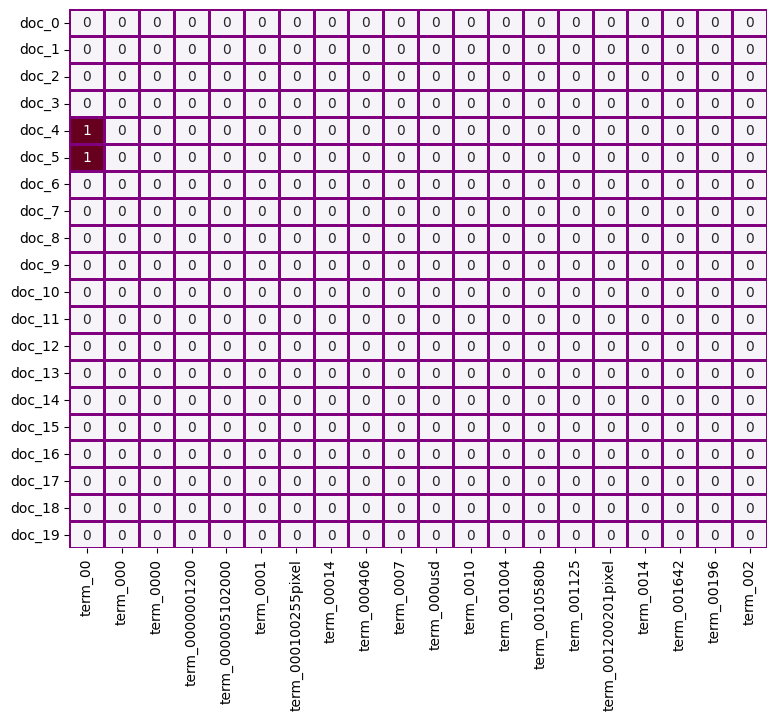

In [13]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

#Exercise 11 - Answer here
#Instead of having the numerical values, we could display the vocab terms
#this is to make it more readable for the user
#Im still working on that exercise
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 linewidths=2,
                 linecolor='purple',
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True,
                 cbar=False)

(2257, 35788)


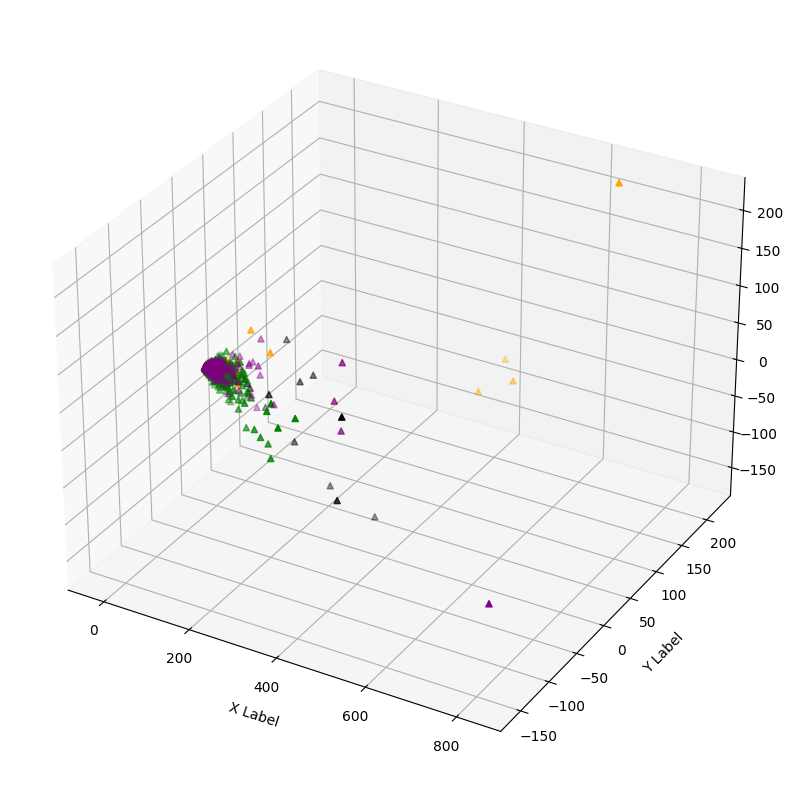

In [14]:
#Exercise 12 - Answer here

from sklearn.decomposition import PCA

#dimension reduction
print(X_counts.shape)
X_3red = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['purple', 'green', 'orange', 'black']

# 3D plot
fig = plt.figure(figsize = (25,10))
#fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_3red[X['category_name'] == category].T[0]
    ys = X_3red[X['category_name'] == category].T[1]
    zs = X_3red[X['category_name'] == category].T[2]

    #ax.scatter(xs, ys, c = c, marker='o')
    ax.scatter(xs, ys, zs, c=c, marker='^')

#ax.grid(color='grey', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [15]:
#Exercise 13 - Answer here
import plotly.express as px

#data
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#plot graph
x_axis=count_vect.get_feature_names_out()[:30]
y_axis=term_frequencies[:30]
fig = px.bar(term_frequencies[:30], x=x_axis, y=y_axis, color=y_axis, title='Plotly Bar Graph')
fig.show()

35788


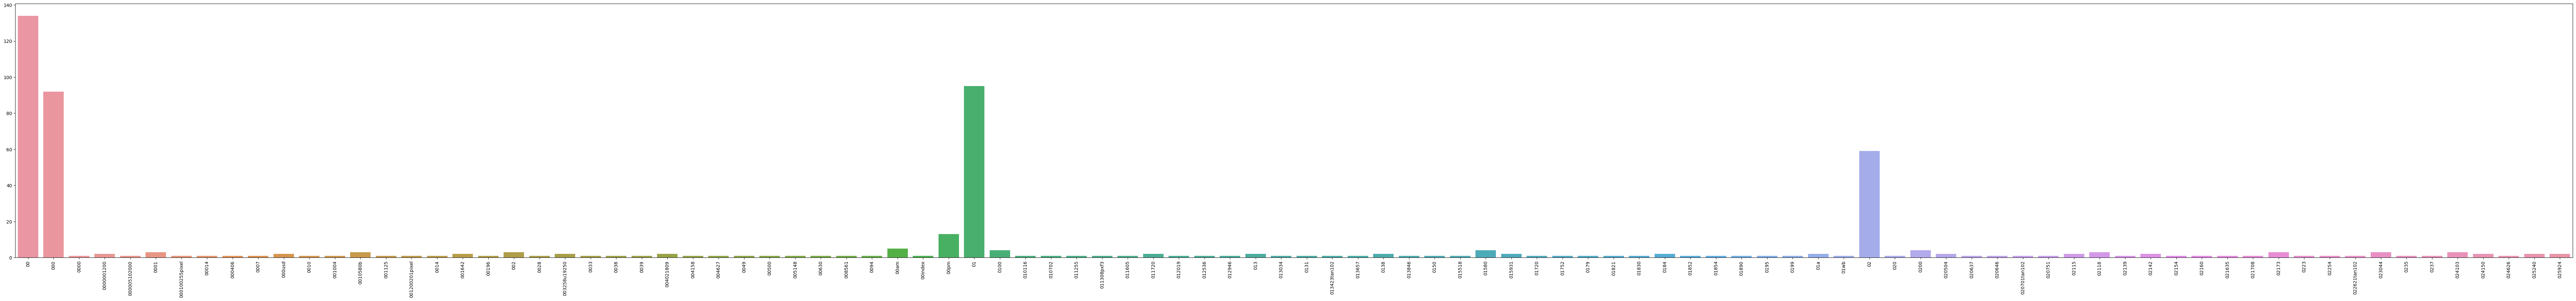

In [16]:
#Exercise 14 - Answer here
#reduced the term frequency to only the first 10 documents
#only displayed the top 10 words

term_frequencies = []

i = 1
while i < 11:
  for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:i,j].toarray()))
  i += 1

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

In [17]:
#Exercise 15 - Answer here

#data
term_frequencies = []
#print(X_counts.shape[1])
i = 1
while i < 11:
  for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:i,j].toarray()))
  i += 1
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#import plotly.express as px

tf = { 'X': term_frequencies[:100],
      'Y':count_vect.get_feature_names_out()[:100]}
fig = px.line(tf, x="X", y="Y", title="Long Tail")
fig.show()

In [106]:
#Exercise 16 - Answer here
#it did not work, stating the LabelBinarizer it is not fitted
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

X['bin2_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

NotFittedError: ignored

# New Dataset

In [1]:
### Begin Assignment Here
#Initial prep before starting preprocessing of files
%load_ext autoreload
%autoreload 2

#allow Collaboratory access to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#necessary access to folders and libraries
import os
folder_path = '/content/drive/MyDrive/NTHU/Data Mining/DM2023-Lab1-Master/Homework'
os.chdir(folder_path)


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import helpers.data_mining_helpers as dmh


# construct dataframe from 3 text files
A = []
files = ['sentiment labelled sentences/amazon_cells_labelled.txt',
         'sentiment labelled sentences/imdb_labelled.txt',
         'sentiment labelled sentences/yelp_labelled.txt']

for i in files:
    temp = []
    with open(i, 'r') as file:
        for i in file:
            columns = i.strip().split('\t')
            if len(columns) == 2:
                sent, score = columns
                #score = int(score)
                row = {'Review': sent, 'Score': score}
                temp.append(row)
    A.extend(temp)

A2 = pd.DataFrame.from_dict(A)
display(A2)

#Add category for Negative/Positive tone
tone = []
for j in range(0,len(A2)):
  if A2.Score[j] == '1':
    tone.append("Positive")
  else:
    tone.append("Negative")

A2['Tone'] = tone
display(A2)

,Review,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


,Review,Score,Tone
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,Negative
2996,Appetite instantly gone.,0,Negative
2997,Overall I was not impressed and would not go b...,0,Negative
2998,"The whole experience was underwhelming, and I ...",0,Negative


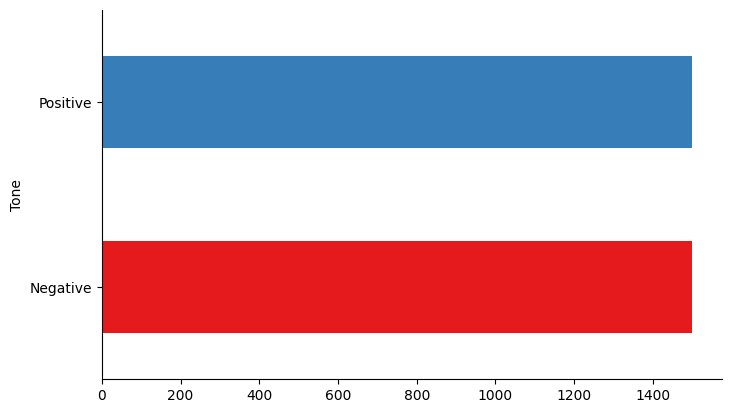

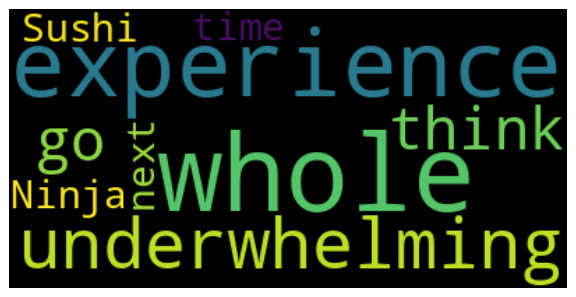

In [4]:
#import library for graph
import matplotlib.pyplot as plt
import seaborn as sns


#verify if there is any missing value
A2.isnull().apply(lambda x: dmh.check_missing_values(x))

#Graph for total of positive and negative reviews
A2.groupby(*['Tone']).size().plot(kind = 'barh',
                                  color=sns.palettes.mpl_palette('Set1'),
                                  figsize=(8,4.8))
plt.gca().spines[['top','right',]].set_visible(False)
plt.show()


#graph from helper functin - for fun
from wordcloud import WordCloud
def plot_word_cloud(text):
    """ Generate word cloud given some input text doc """
    word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(8,6), dpi=90)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(A2.Review[2998])

# Document Matrix from TF-IDF features

In [5]:
#import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')

CV = pd.DataFrame.from_dict(A)

#tokenize
CV['unigrams'] = CV['Review'].apply(lambda x: dmh.tokenize_text(x))
#CV[0:4]["unigrams"]

#Count vectorizer
count_vect = CountVectorizer()
CV_counts = count_vect.fit_transform(CV.Review)
analyze = count_vect.build_analyzer()
#analyze(CV.Review[0])
analyze(" ".join(list(CV.Review[:])))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter',
 'good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'the',
 'jawbone',
 'tied',
 'to',
 'charger',
 'for',
 'conversations',
 'lasting',
 'more',
 'than',
 '45',
 'minutes',
 'major',
 'problems',
 'the',
 'mic',
 'is',
 'great',
 'have',
 'to',
 'jiggle',
 'the',
 'plug',
 'to',
 'get',
 'it',
 'to',
 'line',
 'up',
 'right',
 'to',
 'get',
 'decent',
 'volume',
 'if',
 'you',
 'have',
 'several',
 'dozen',
 'or',
 'several',
 'hundred',
 'contacts',
 'then',
 'imagine',
 'the',
 'fun',
 'of',
 'sending',
 'each',
 'of',
 'them',
 'one',
 'by',
 'one',
 'if',
 'you',
 'are',
 'razr',
 'owner',
 'you',
 'must',
 'have',
 'this',
 'needless',
 'to',
 'say',
 'wasted',
 'my',
 'money',
 'what',
 'waste',
 'of',
 'money',
 'and',
 'time',
 'and',
 'the',
 'sound',
 'quality',
 'is',
 'great',
 'he',
 'was',
 'very',
 'impressed'

In [6]:
#TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

TF = vectorizer.fit_transform(CV.Review)
print(TF.shape)
#print(X)

#sparse matrix to dataframe for readability
TF_X = pd.DataFrame(TF.toarray(), columns=vectorizer.get_feature_names_out())
print(TF_X)

(3000, 4896)
       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombi

In [7]:
#Word Frequency Features
term_frequencies = []
print(CV_counts.shape[1])
for i in range(0,CV_counts.shape[1]):
    term_frequencies.append(sum(CV_counts[:,i].toarray()))

term_frequencies = np.asarray(CV_counts.sum(axis=0))[0]


5155


In [77]:
from tarfile import XGLTYPE
#Multinomial Naive Bayes classifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB

X = CV_counts
Y = CV.Review



mnb = MultinomialNB(force_alpha=True)
mnb.fit(X, Y)
print(mnb.predict(X[2:3]))

['Four stars for the food & the guy in the blue shirt for his great vibe & still letting us in to eat !']


In [82]:
#Complement Naive Bayes classifier
from sklearn.naive_bayes import ComplementNB

X = TF_X
y = CV.Review

CNB = ComplementNB(force_alpha=True)
CNB.fit(X,y)
print(CNB.predict(X[2:3]))



['Great for the jawbone.']


# TF-IDF VS Word Frequency

**Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.**



*   The TF-IDF classifiers focused on both the frequency of the term and how often it showed up across the different documents (sentences). The word frequency classifiers focused only on how often the word appeared
*  In TF-IDF each term received a weight - with the rare terms having a higher score than the more common terms - which represented how important it was
* The TF-IDF classifiers would be more useful for our term classifications as it will provide a better look into important words that would indicate a certain category (fantastic - for positive reviews) and not be influenced by the more common terms used (so - can be either category)




# Improve the Data preprocessing for these specific datasets



1.   We removed 'stopped' words but could have also removed more commonly used words like 'I, the, is'. This would have reduced our 'irrelevant' word count
2.   Remove punctuations
3. Modify the texts to be all lower case
4. When doing research I also read of Stemming and Lemmatization. We could have reduced terms to their base word. So instead of having **wants, wanted, wanting**, as 3 different terms with their frequency of 1 we could have had **want** with a frequency of 3.
5. Use other more powerful built in libraries for preprocessing?

